## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem


# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharma_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')
# Display the data table for preview
pharma_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
pharma_df['Mouse ID'].count()

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pharma_df['Mouse ID'].value_counts()


g989    13
g288    10
p136    10
c402    10
x402    10
        ..
o848     1
l872     1
d133     1
h428     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

pharma_df_dupID = pharma_df[pharma_df['Mouse ID'] =='g989']
pharma_df_dupID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_pharma_df = pharma_df[pharma_df['Mouse ID'] !='g989']
clean_pharma_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_pharma_df['Mouse ID'].value_counts()

g791    10
t565    10
c402    10
x402    10
r554    10
        ..
o848     1
l872     1
d133     1
h428     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_reg_group = clean_pharma_df.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_statistics = pd.DataFrame([drug_reg_group['Tumor Volume (mm3)'].mean(),drug_reg_group['Tumor Volume (mm3)'].median(), drug_reg_group['Tumor Volume (mm3)'].std(), drug_reg_group['Tumor Volume (mm3)'].var(), drug_reg_group['Tumor Volume (mm3)'].sem()], index=['Mean', 'Median', 'Std. dev', 'Variance', 'SEM'])
summary_statistics

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Mean,40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.320930,40.216745,54.233149,53.236507
Median,41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.446266,40.673236,52.431737,51.818479
Std. dev,4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.622085,4.846308,7.710419,6.966589
Variance,24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.852013,23.486704,59.450562,48.533355
SEM,0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.544332,0.320955,0.573111,0.516398


In [10]:
drug_reg_group.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


## Bar and Pie Charts

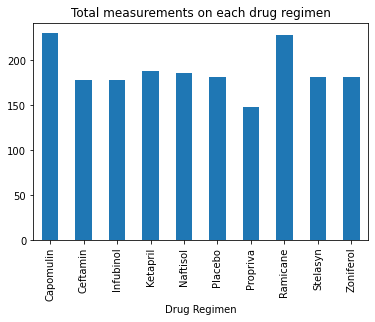

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measures = drug_reg_group['Mouse ID'].count()


pharma_barchart = measures.plot.bar( y = "Number of measurement", title="Total measurements on each drug regimen" , legend =False)
pharma_barchart

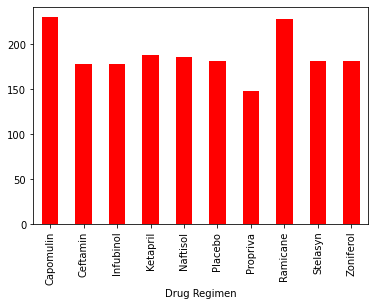

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

pharma_barchart_plt = measures.plot(kind="bar", facecolor="red")
plt.show()

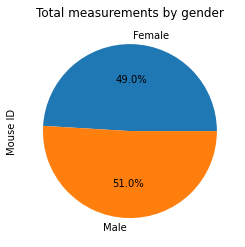

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_pharma_df.groupby(['Sex'])
count_gender = gender_group['Mouse ID'].count()
pharma_barchart_pie = count_gender.plot.pie(autopct="%1.1f%%",title="Total measurements by gender", legend =False)
pharma_barchart_pie



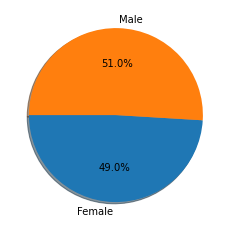

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
pharma_barchart_pieplt = plt.pie(count_gender,labels=labels,autopct="%1.1f%%", shadow=True, startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
#filter the treatment regimens -- Capomulin, Ramicane, Infubinol, and Ceftamin
cap = pharma_df.loc[pharma_df["Drug Regimen"] == "Capomulin",:]
ram = pharma_df.loc[pharma_df["Drug Regimen"] == "Ramicane",:]
inf = pharma_df.loc[pharma_df["Drug Regimen"] == "Infubinol",:]
cef = pharma_df.loc[pharma_df["Drug Regimen"] == "Ceftamin",:]

#find the max timepoint for each mouse Capomulin and put it in to a dataframe
cap_last = cap.groupby('Mouse ID').max()['Timepoint']
cap_vol = pd.DataFrame(cap_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_merge = pd.merge(cap_vol, pharma_df, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [26]:
#find the max timepoint for each mouse Ramicane and put it in to a dataframe
ram_last = ram.groupby('Mouse ID').max()['Timepoint']
ram_vol = pd.DataFrame(ram_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ram_merge = pd.merge(ram_vol, pharma_df, on=("Mouse ID","Timepoint"),how="left")
ram_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Put treatments into a list for for loop (and later for plot labels)
for treatment in cap_merge:
    
    


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
